# SALES PREDICTION MODEL

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### DATA COLLECTION

In [82]:
df = pd.read_csv('data/Advertising.csv')

In [83]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [84]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### DATA PREPROCESSING AND CLEANING

In [85]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

*no null values in the dataset- no requirement for null handling.*

In [86]:
# dropping the 'Unamed: 0' column

df = df.drop(columns='Unnamed: 0', inplace=False)

In [87]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


*dropped the indexing column as it wouldn't contribute to the learnning process.*

#### EXPLORATORY DATA ANALYSIS

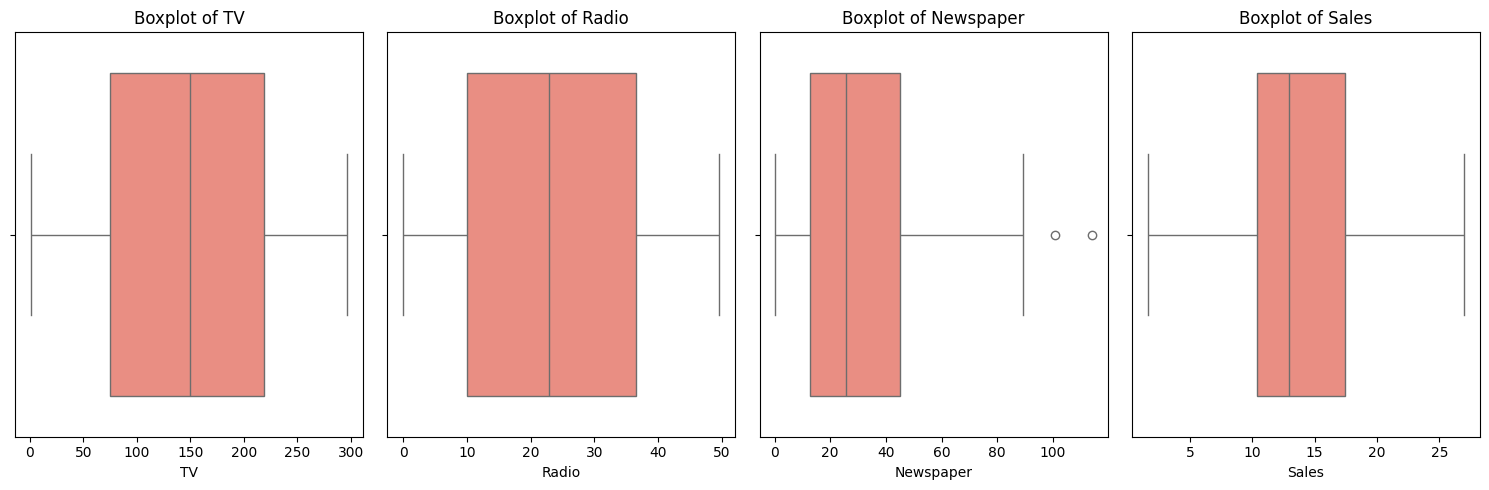

In [88]:

plt.figure(figsize=(15, 5))

for i, col in enumerate(df.columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig('Outputs/boxplot_before_outliers_handling.png')
plt.show()

*some minor outliers in Newspaper column only*

In [89]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

print("Before removing outliers:", df.shape)
# remove outliers from the numerical columns
for col in df.columns:
    df = remove_outliers_iqr(df, col)
    print(f"Removed outliers from {col}")

print("After removing outliers:", df.shape)

Before removing outliers: (200, 4)
Removed outliers from TV
Removed outliers from Radio
Removed outliers from Newspaper
Removed outliers from Sales
After removing outliers: (198, 4)


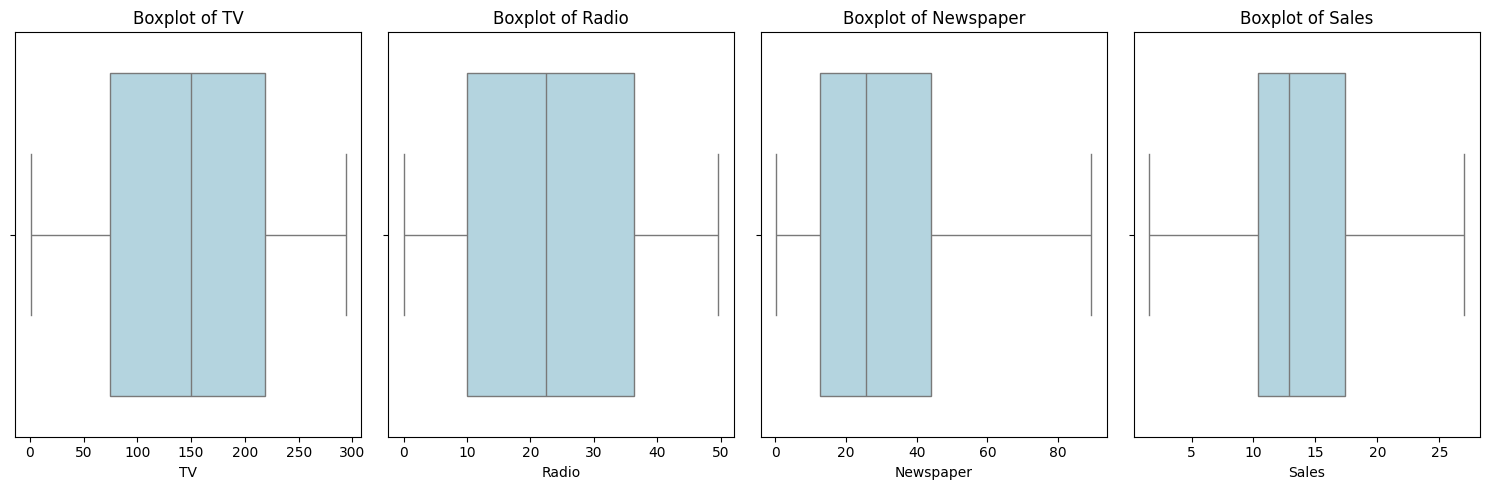

In [90]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(df.columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig('Outputs/boxplot_after_outliers_handling.png')
plt.show()

*after applying the IQR method, no outliers were left in the dataset.*

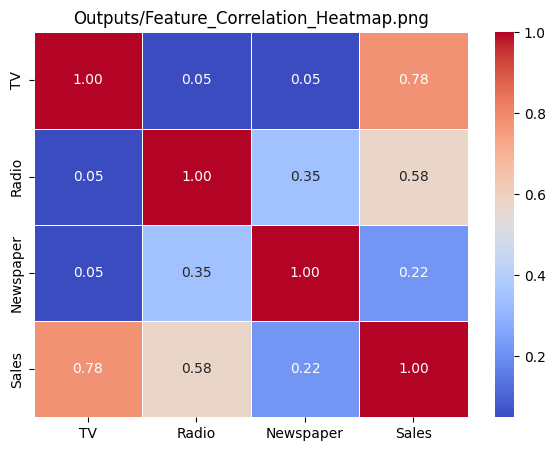

In [103]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Outputs/Feature_Correlation_Heatmap.png')
plt.savefig('Outputs/Feature_Correlation_Heatmap.png')
plt.show()

|Feature  |Correlation with Sales|Takeaways|
|---------|----------------------|---------|
|TV       |0.78                  |Strongest correlation meaning high impact on prediction.|
|Radio    |0.58                  |Moderate correlation but still contributing.|
|Newspaper|0.22                  |Weakest influence|

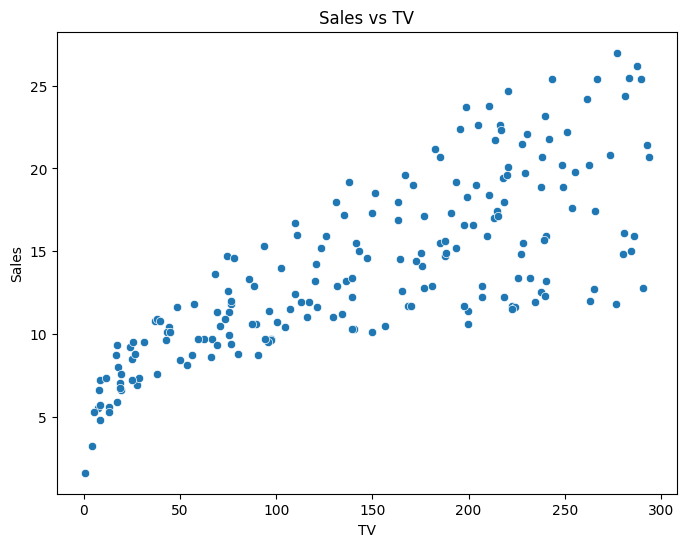

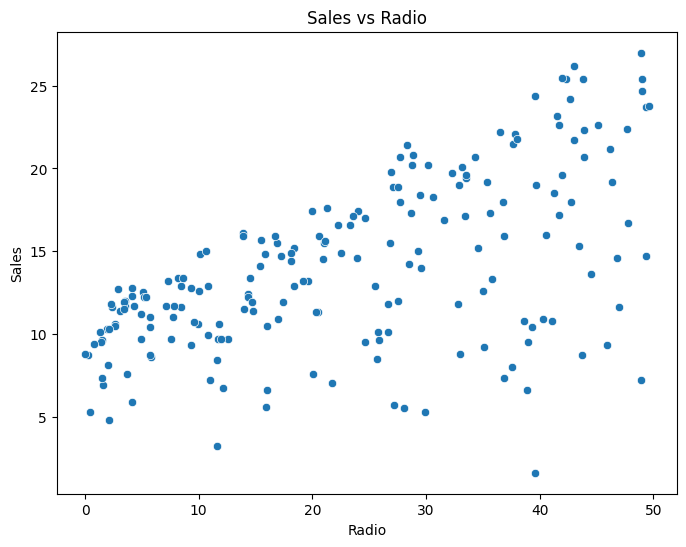

In [92]:
# plotting Sales vs TV
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.savefig('Outputs/Sales_vs_TV.png')
plt.show()

# Sales vs Radio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Sales vs Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.savefig('Outputs/Sales_vs_Radio.png')
plt.show()

In [93]:
# Preprocessing the preparing data splits for the training
X = df.drop(columns='Sales', axis=1)
Y = df['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)  # 80-20 split (80 for training)

In [94]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

#### TRAINING REGRESSION MODELS

In [95]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

Evaluation_scores = {}

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# instanciating models into 2 categories
# s_models for models which require standardised data
s_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}

# ns_models for models which require non-standardised data
ns_models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Lineas SVR': SVR(kernel='linear'),
    'Polynomial SVR': SVR(kernel='poly'),
    'RBF SVR': SVR(kernel='rbf'),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

In [97]:
# Function to train (on standardised data) and evaluate the model and store the evaluation results in `Evaluation_scores`
def evaluate_on_std(models, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, Y_train=Y_train, Y_test=Y_test):
    for model_name, model in models.items():
        model.fit(X_train_scaled, Y_train)
        y_pred = model.predict(X_test_scaled)

        Evaluation_scores[model_name] = {
            'MAE': mean_absolute_error(Y_test, y_pred),
            'RMSE': root_mean_squared_error(Y_test, y_pred),
            'R2 Score': r2_score(Y_test, y_pred)
        }
    return


In [98]:
# Function to train (on non-standardised data) and evaluate the model and store the evaluation results in `Evaluation_scores`
def evaluate_on_non_std(models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    for model_name, model in models.items():
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        Evaluation_scores[model_name] = {
            'MAE': mean_absolute_error(Y_test, y_pred),
            'RMSE': root_mean_squared_error(Y_test, y_pred),
            'R2 Score': r2_score(Y_test, y_pred)
        }
    return


In [99]:
# evaluate the models separately

# evaluate on non standardised data
evaluate_on_non_std(ns_models)

# evaluate on standardised data
evaluate_on_std(s_models)

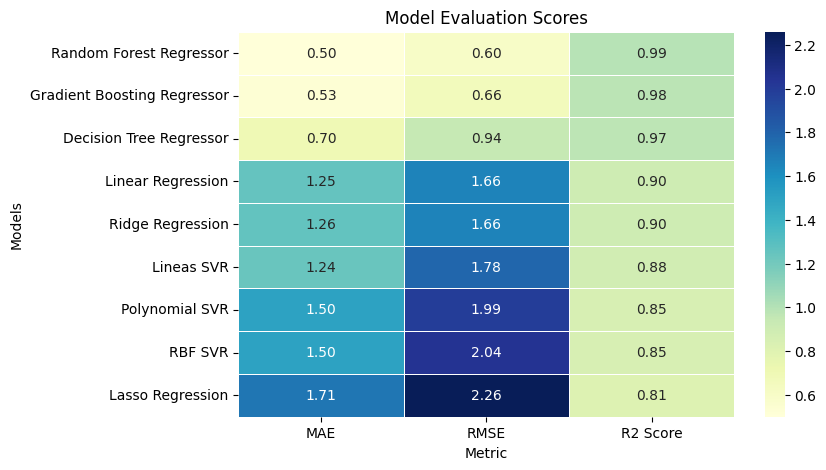

In [100]:
# Visualise the Evaluation scores
Evaluation_scores = pd.DataFrame(Evaluation_scores)

Evaluation_scores = Evaluation_scores.T
Evaluation_scores = Evaluation_scores.sort_values(by='R2 Score', ascending=False)
Evaluation_scores = Evaluation_scores.round(2)

plt.figure(figsize=(8, 5))
sns.heatmap(data=Evaluation_scores, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Model Evaluation Scores')
plt.xlabel('Metric')
plt.ylabel('Models')
plt.savefig('Outputs/Model_Evaluation_Metrics_Heatmap.png')
plt.show()


*The Random Forest Regressor, Gradient Boosting Regressor and Decision Tree Regressor performed exceptionally well than other models.*

In [101]:
# Hyperparameter tuning for the best model
from sklearn.model_selection import GridSearchCV

# Using Random Forest Regressor as the best model based on R2 Score
rf_model = RandomForestRegressor()

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fitting the model
grid_search.fit(X_train, Y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Evaluating the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluation metrics for the best model
best_evaluation_scores = {
    'MAE': mean_absolute_error(Y_test, y_pred_best),
    'RMSE': root_mean_squared_error(Y_test, y_pred_best),
    'R2 Score': r2_score(Y_test, y_pred_best)
}

print("Best Model Evaluation Scores:", best_evaluation_scores)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Evaluation Scores: {'MAE': 0.49957500000000205, 'RMSE': 0.6068478598462729, 'R2 Score': 0.9864224839712274}


In [102]:
# export the best rf model 
import joblib
joblib.dump(best_rf_model, 'Outputs/best_random_forest_model.pkl')

['Outputs/best_random_forest_model.pkl']